# Segmentação e contornos de graõs de arroz
Para a realização deste trabalho é usado a linguagem de programação [Python](https://www.python.org/) na versão 3.8. Para a implementação do algoritmo é usado as bibliotecas: [Opencv](https://opencv.org/) na versão 3.5, [Imutils](https://github.com/jrosebr1/imutils) na versão 0.5.4, e [Matplotlib](https://matplotlib.org/stable/index.html) na versão 3.3. 

  * Primeiro é usado um algoritmo de segmentação, para posteriormente, realizar os contornos apenas nos objetos de interesse.
   *  [*Adaptive Threshold*](https://docs.opencv.org/3.4/d7/d4d/tutorial_py_thresholding.html)
  * Posteriormente é usado um tecnicas de cotornos de objetos em imagens.
      * [findContours](https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html) 
      * [drawContours](https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html)
      * [grab_contours]() 

In [1]:
# Bibliotecas usadas
import cv2
import matplotlib.pyplot as plt
import imutils

### Função para plotar as imagens

In [2]:
def image_plot(img, seg_img, titulo): # Recebe duas imagens e uma lista com os titulos
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Covertendo a imagem para RGB 
    seg_img = cv2.cvtColor(seg_img, cv2.COLOR_BGR2RGB) #Covertendo a imagem para RGB

    fig, ax1 = plt.subplots(1, 2, figsize=(12, 8)) # Criando os objetos para o subplot
    plt.tight_layout() # Definindo Layaut da imagem 
    fig.suptitle(titulo[0]) # Titulo da figura
    ax1[0].set_title(titulo[1]) # Titulo da primeira subfigura
    ax1[1].set_title(titulo[2]) # # Titulo da segunda subfigura

    ax1[0].imshow(img) # Platando a primeira imagem
    ax1[1].imshow(seg_img) # Platando a segunda imagem
    
    plt.show()

### Lenado a imagem e transformando a mesma em escala de cinza

In [3]:
# Lendo a imagem e deixando ela com a escala de 500 por 500
image = cv2.imread("arroz.png") # Lendo a imagem
image = cv2.resize(image, (500, 500)) # Transformando o tamanho em 500 por 500 pixeis 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Transformando em escala de Cinzar

### Usando *Adaptive Threshold* do opencv para segmentar os grãos de arroz

O *Adaptive Threshold* é um algoritmo de segmentação baseado limiaridade que usa limiares adaptativos, esse algoritmo determina o limite de um pixel com base em uma pequena região ao seu redor. Portanto, é obitdo limites diferentes para regiões diferentes da mesma imagem, o que dá melhores resultados para imagens com iluminação variável.

Esse algoritmo possuí 6 parâmetros de entrada:

   * O primeiro é a imagem que será segmentada que deve ser uma imagem em tons de cinza (image).
   * O segundo consiste no valor maximo de máximo atribuído a valores de pixel que excedem o limite (255.0).
   * O terceiro parametro cosiste no método de limiarização, esse método usa a média da área vizinhança menos uma constante [(ADAPTIVE_THRESH_MEAN_C)](https://docs.opencv.org/4.4.0/d7/d1b/group__imgproc__misc.html#ggaa42a3e6ef26247da787bf34030ed772cad0c5199ae8637a6b195062fea4789fa9).
   * O quanto argumento da função consiste no tipo de limearizador que nesse caso é o [(THRESH_BINARY)](https://docs.opencv.org/4.4.0/d7/d1b/group__imgproc__misc.html#ggaa9e58d2860d4afa658ef70a9b1115576a147222a96556ebc1d948b372bcd7ac59), transforma uma imagem em tons de cinza em uma imagem binária, ou seja, os pixeis com o valor maior que o limear é atribuido a 0.
   * O quinto argumento da função consiste no tamanhos da vizinhaça usada para calcular a media, 51 ou senha a visinhaça vai ser de 51x51 pixeis.
   * Por fim a constante que é usada para subtrar a média dos pixeis vizinhos (-20.0)
   


In [4]:
# Usando a função do OpenCV para aplicar o adaptiveThreshold para seguimentar a imagem
output_adapthresh = cv2.adaptiveThreshold(gray_image, 255.0,
		 cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,  51,  -20.0)

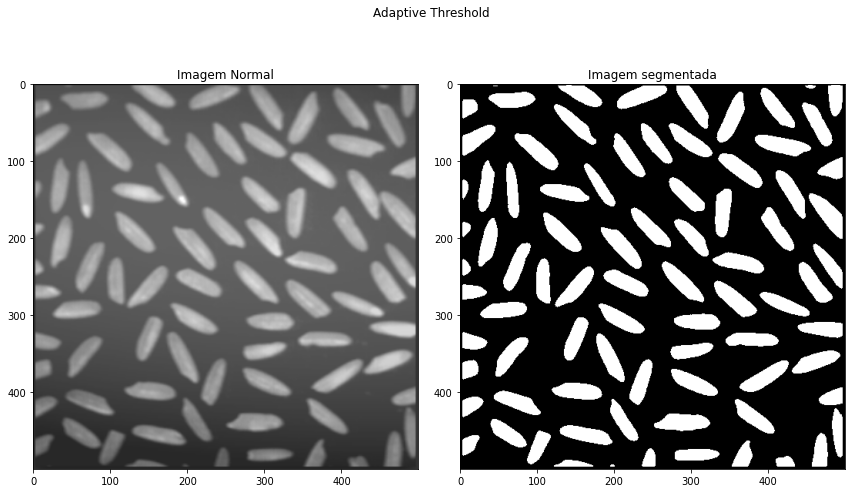

In [5]:
# Plotando a imagem normal e a imagem segmentada lado a lado.
image_plot(image, output_adapthresh, ["Adaptive Threshold", "Imagem Normal", 
                                       "Imagem segmentada"])

### Aplicando os contornos vermelhos nos objetos segmentados
Os contornos podem ser explicados simplesmente como uma curva que une todos os pontos contínuos (ao longo da fronteira), tendo a mesma cor ou intensidade. Os contornos são uma ferramenta útil para análise de formas e detecção e reconhecimento de objetos.

É utilizado três funções para realizar os contornos:
  * [findContours](https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html) do Opencv
     * Há três argumentos na função *cv.findContours()*, o primeiro é a imagem de origem, o segundo é o modo de recuperação de contorno e o terceiro é o método de aproximação de contorno. *cnts* é uma lista Python de todos os contornos da imagem. Cada contorno individual é um array de coordenadas (x, y) de pontos de fronteira do objeto.
  
  * [grab_contours]() da biblioteca Imutils
   * Essa biblioteca é usada apenas para normalizar o tipo de retorno da lista de contorno, para ser compatível com a proxima função *drawContours*
  
  * [drawContours](https://docs.opencv.org/master/d4/d73/tutorial_py_contours_begin.html) também do Opencv
      * Para desenhar os contornos, a função *cv.drawContours* é usada. Ela também pode ser usado para desenhar qualquer forma, desde que tenha os pontos de limite. Seu primeiro argumento é a imagem de origem, o segundo argumento são os contornos que devem ser passados como uma lista Python, o terceiro argumento é o índice de contornos (útil ao desenhar contornos individuais, para desenhar todos os contornos, usa-se  -1) e os argumentos restantes são cor (Vermelha "0, 0, 255") e espessura do cotorno.
  

In [12]:
cnts = cv2.findContours(output_adapthresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Criando a lista de contornos
cnts = imutils.grab_contours(cnts) # Normalizando o tipo da lista

for c in cnts:
    cv2.drawContours(image, [c], -1, (0, 0, 255), 2) # Realizando os contornos na imagem

print("A imagem tem "+str(len(cnts))+" grãos de arroz") # A quantidade de arroz

A imagem tem 82 grãos de arroz


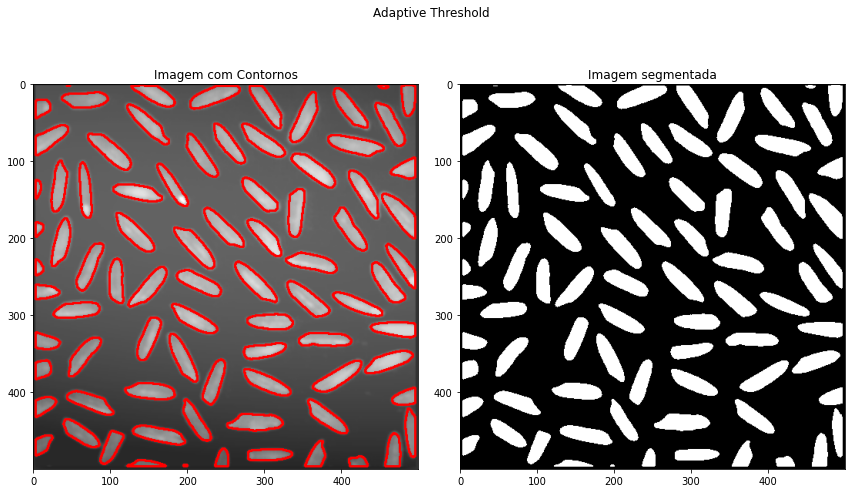

In [7]:
# Plotando a imagem  com os contornos dos arroz 
image_plot(image, output_adapthresh, ["Adaptive Threshold", "Imagem com Contornos", 
                                       "Imagem segmentada"])